Data Loading

In [6]:
import pandas as pd 
import numpy as np 

df = pd.read_csv("D:\superstore\data\SampleSuperstore.csv") 

print("Shape:", df.shape)

#df.head()

Shape: (9994, 13)


(9994, 13)

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Data Cleaning

In [13]:
print("null values:\n", df.isnull().sum()) 
print("\nDuplicate rows:", df.duplicated().sum())

null values:
 Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Duplicate rows: 17


In [14]:
df = df.drop_duplicates()
print("shape after removing duplicates:", df.shape)

shape after removing duplicates: (9977, 13)


Feature Engineering

In [16]:
df["Profit_Margin"] = df["Profit"] / df["Sales"] 

df["Sales_Status"] = df["Profit"].apply(lambda x:"Profit" if x>0 else "Loss") 

df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit_Margin,Sales_Status
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,0.1600,Profit
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,0.3000,Profit
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,0.4700,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-0.4000,Loss
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,0.1125,Profit


In [17]:
df[df["Sales"]==0]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit_Margin,Sales_Status


In [18]:
df.to_csv("D:\superstore\data\Clean_Superstore.csv", index=False) 
print("Clean_Superstore.csv saved successfully!")

Clean_Superstore.csv saved successfully!


Exploratory Data Analysis (EDA)

In [21]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit,Profit_Margin
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000,9977.000000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013,0.120114
std,32058.266816,623.721409,2.226657,0.206455,234.45784,0.466638
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800,-2.750000
25%,23223.000000,17.300000,2.000000,0.000000,1.72620,0.075000
50%,55901.000000,54.816000,3.000000,0.200000,8.67100,0.270000
75%,90008.000000,209.970000,5.000000,0.200000,29.37200,0.362500
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600,0.500000


In [22]:
total_sales = df["Sales"].sum()
total_profit = df["Profit"].sum()

print("Total_Sales:", round(total_sales, 2))
print("Total_Profit:", round(total_profit, 2))

Total_Sales: 2296195.59
Total_Profit: 286241.42


In [25]:
OverAllProfitMargin = total_profit / total_sales

print("Overall Profit Margin:", round(OverAllProfitMargin, 3))

Overall Profit Margin: 0.125


In [26]:
region_summary = df.groupby("Region")[["Sales", "Profit"]].sum().sort_values(by="Sales", ascending=False) 

region_summary

,Sales,Profit
Region,,
West,725255.6365,108329.8079
East,678435.1960,91506.3092
Central,500782.8528,39655.8752
South,391721.9050,46749.4303


In [28]:
category_summery = df.groupby("Category")[["Sales", "Profit"]].sum().sort_values(by="Sales", ascending=False) 

category_summery

,Sales,Profit
Category,,
Technology,836154.0330,145454.9481
Furniture,741306.3133,18421.8137
Office Supplies,718735.2440,122364.6608


In [30]:
sub_category_summery = df.groupby("Sub-Category")[["Sales", "Profit"]].sum().sort_values(by="Profit", ascending=False)

sub_category_summery

,Sales,Profit
Sub-Category,,
Copiers,149528.0300,55617.8249
Phones,330007.0540,44515.7306
Accessories,167380.3180,41936.6357
Paper,78224.1420,33944.2395
Binders,203409.1690,30228.0003
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Appliances,107532.1610,18138.0054
Furnishings,91683.0240,13052.7230


Visualization

In [31]:
import matplotlib.pyplot as plt 

Category-wise Sales Bar Chart

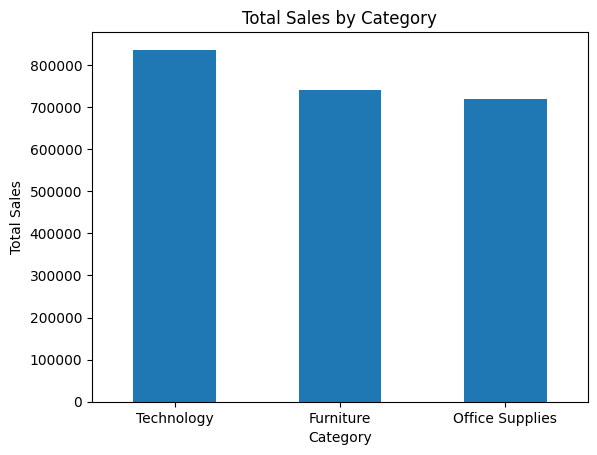

In [33]:
category_sales = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)

#plt.figure(fitsize = (8,5))
category_sales.plot(kind="bar")
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.xticks(rotation = 0)
plt.show()

Sub-Category Profit Bar Chart (Top 10)

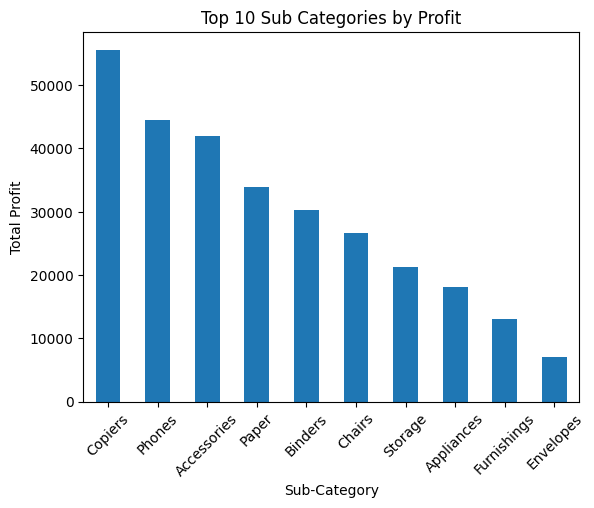

In [35]:
sub_profit = df.groupby("Sub-Category")["Profit"].sum().sort_values(ascending=False).head(10) 

sub_profit.plot(kind="bar")
plt.title("Top 10 Sub Categories by Profit")
plt.xlabel("Sub-Category")
plt.ylabel("Total Profit")
plt.xticks(rotation = 45)
plt.show()

Region-wise Profit Chart 

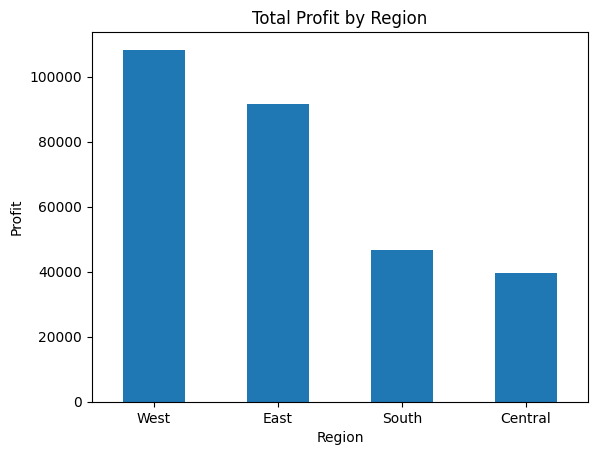

In [36]:
region_profit = df.groupby("Region")["Profit"].sum().sort_values(ascending=False)

region_profit.plot(kind="bar")
plt.title("Total Profit by Region")
plt.xlabel("Region")
plt.ylabel("Profit")
plt.xticks(rotation = 0)
plt.show()

Discount Impact Analysis (VERY IMPORTANT)

In [38]:
discount_summery = df.groupby("Discount")[["Sales", "Profit"]].sum().sort_index() 
discount_summery

,Sales,Profit
Discount,,
0.00,1.087278e+06,320844.4073
0.10,5.436935e+04,9029.1770
0.15,2.755852e+04,1418.9915
0.20,7.645049e+05,90306.6070
0.30,1.029453e+05,-10357.2186
0.32,1.449346e+04,-2391.1377
0.40,1.164178e+05,-23057.0504
0.45,5.484974e+03,-2493.1111
0.50,5.891854e+04,-20506.4281


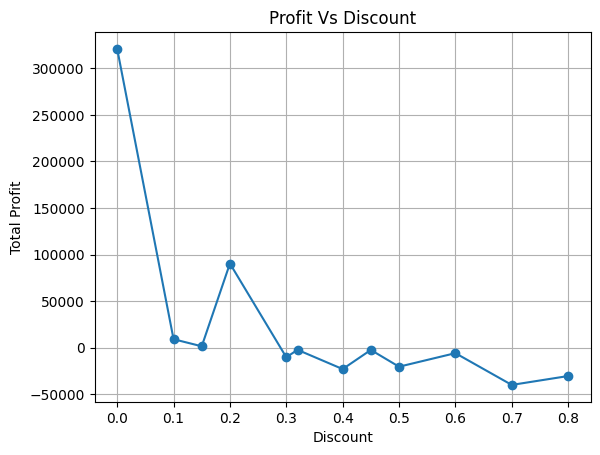

In [39]:
plt.plot(discount_summery.index, discount_summery["Profit"], marker="o")
plt.title("Profit Vs Discount")
plt.xlabel("Discount")
plt.ylabel("Total Profit")
plt.grid(True)
plt.show()

📌 Business Insights (Example Format)

Technology category generates the highest revenue among all categories.

Copiers sub-category contributes the highest profit.

Higher discount levels lead to significant profit reduction and losses.

Some sub-categories have strong sales but negative profit, indicating pricing or discount issues.

🔍 Key Findings

Technology category generates the highest overall sales.

Copiers sub-category contributes the highest profit.

Discounts above 50% significantly reduce profitability.

At 70% discount, the business experiences major losses, indicating poor discounting strategy.